In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("NYC_Jobs.csv")
data.head()

,Job ID,Civil Service Title,Agency,Posting Type,Job Category,Salary Range From,Salary Range To
0,424339,PUBLIC HEALTH NURSE,DEPT OF HEALTH/MENTAL HYGIENE,External,Health,84252.0,84252.0
1,379094,CERT IT DEVELOPER (APP),NYC EMPLOYEES RETIREMENT SYS,External,NaN,82884.0,116391.0
2,520417,EXECUTIVE AGENCY COUNSEL,NYC HOUSING AUTHORITY,External,Legal Affairs,105000.0,125000.0
3,233549,CERTIFIED IT ADMINISTRATOR (LA,NYC EMPLOYEES RETIREMENT SYS,External,Information Technology & Telecommunications,87203.0,131623.0
4,510256,ASSOCIATE HUMAN RIGHTS SPECIAL,HUMAN RIGHTS COMMISSION,External,Constituent Services & Community Programs,58449.0,67216.0


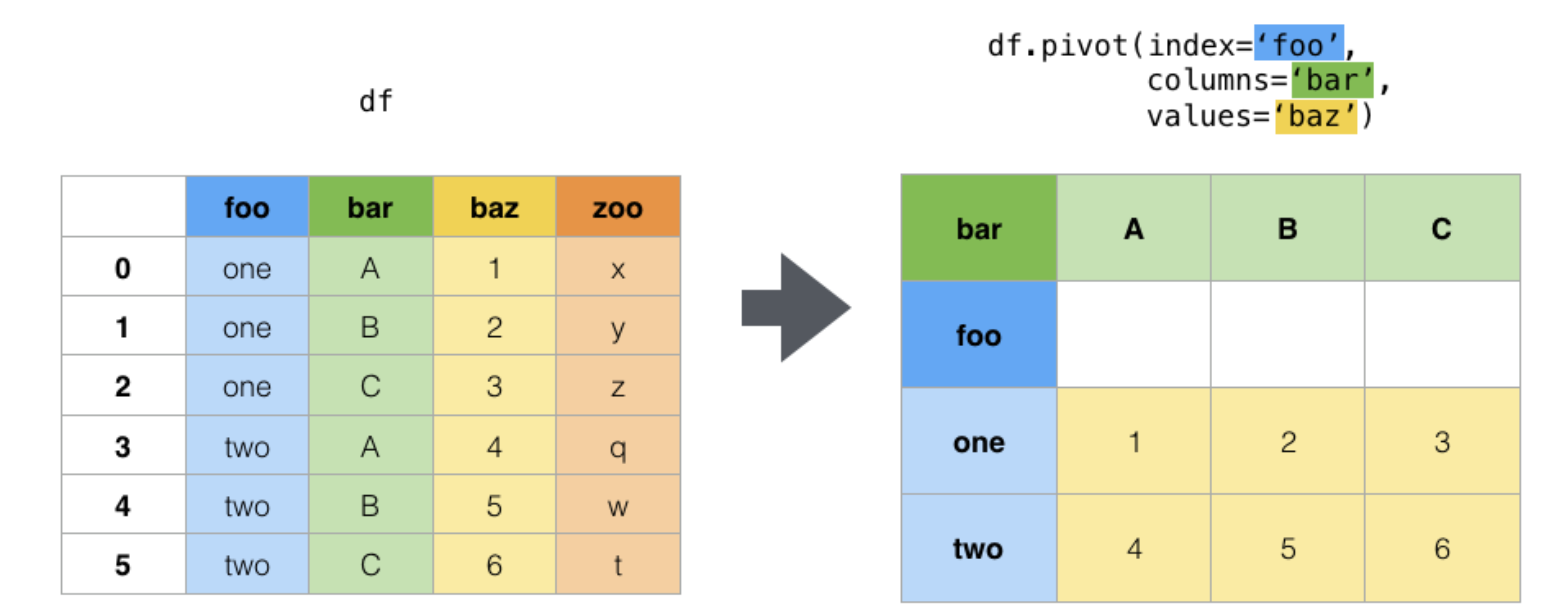

## Pivot

In [78]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [83]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


## Pivot_table

In [94]:
df.pivot_table(values="baz", index=["foo", "bar"], columns=["zoo"])

zoo        q    t    w    x    y    z
foo bar                              
one A    NaN  NaN  NaN  1.0  NaN  NaN
    B    NaN  NaN  NaN  NaN  2.0  NaN
    C    NaN  NaN  NaN  NaN  NaN  3.0
two A    4.0  NaN  NaN  NaN  NaN  NaN
    B    NaN  NaN  5.0  NaN  NaN  NaN
    C    NaN  6.0  NaN  NaN  NaN  NaN

In [92]:
data.pivot(values='Salary Range From', index='Job ID', columns="Agency")

ValueError: Index contains duplicate entries, cannot reshape

In [89]:
data.pivot_table(values='Salary Range From', index='Job ID', columns="Agency")

Agency,ADMIN FOR CHILDREN'S SVCS,ADMIN TRIALS AND HEARINGS,BOARD OF CORRECTION,BOROUGH PRESIDENT-QUEENS,BUSINESS INTEGRITY COMMISSION,CAMPAIGN FINANCE BOARD,CIVIL SERVICE COMMISSION,CIVILIAN COMPLAINT REVIEW BD,CONFLICTS OF INTEREST BOARD,CONSUMER AND WORKER PROTECTION,...,OFF OF PAYROLL ADMINISTRATION,OFFICE OF EMERGENCY MANAGEMENT,OFFICE OF MANAGEMENT & BUDGET,OFFICE OF THE ACTUARY,OFFICE OF THE COMPTROLLER,POLICE DEPARTMENT,PRESIDENT BOROUGH OF MANHATTAN,PUBLIC ADMINISTRATOR-NEW YORK,TAXI & LIMOUSINE COMMISSION,TEACHERS RETIREMENT SYSTEM
Job ID,,,,,,,,,,,,,,,,,,,,,
87990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
pd.pivot_table(df, values="baz", index=["foo", "bar"], columns=["zoo"])

zoo        q    t    w    x    y    z
foo bar                              
one A    NaN  NaN  NaN  1.0  NaN  NaN
    B    NaN  NaN  NaN  NaN  2.0  NaN
    C    NaN  NaN  NaN  NaN  NaN  3.0
two A    4.0  NaN  NaN  NaN  NaN  NaN
    B    NaN  NaN  5.0  NaN  NaN  NaN
    C    NaN  6.0  NaN  NaN  NaN  NaN

## Stack

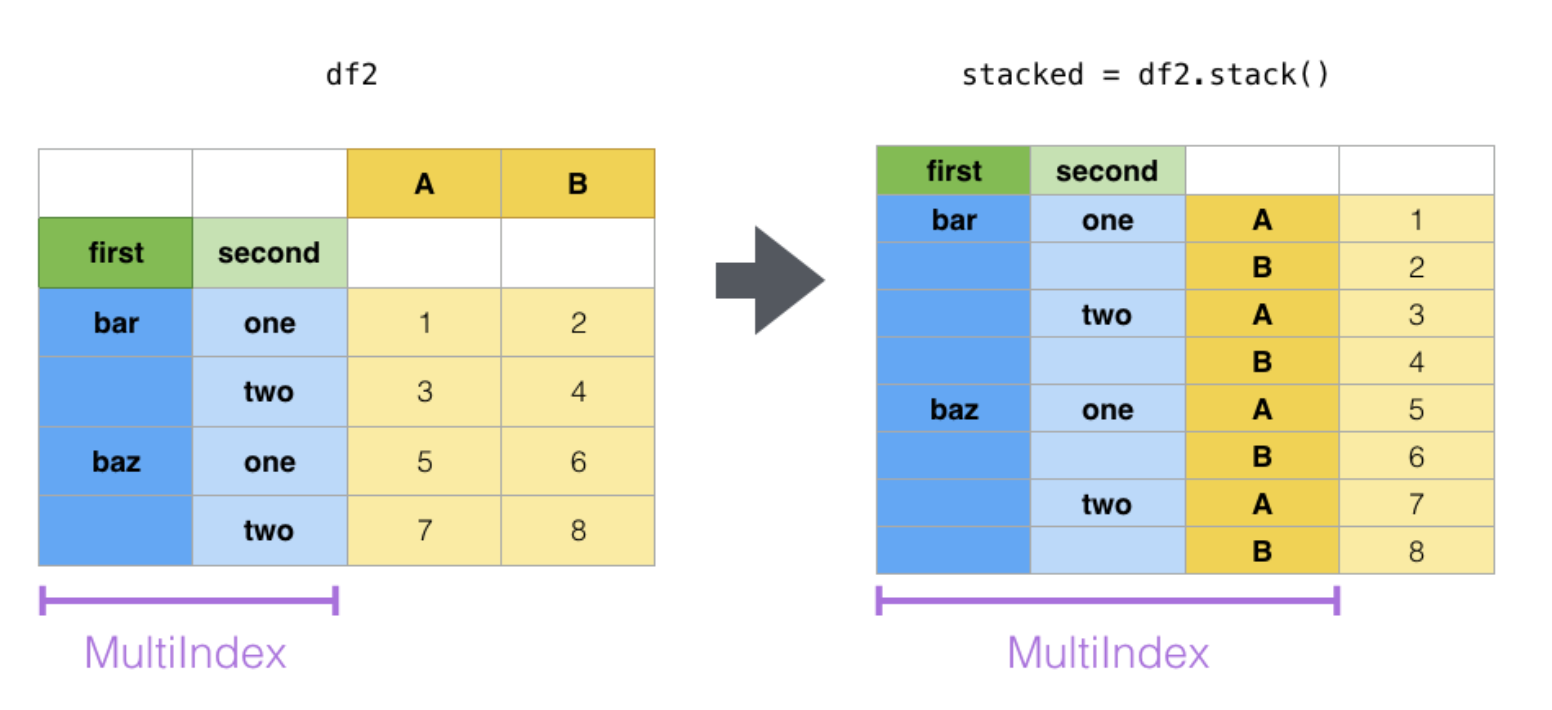

In [37]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.182731  0.231873
      two     1.741032  1.565681
baz   one     0.629483  0.086612
      two     0.283032  0.343013

In [47]:
a = pd.DataFrame(df.stack())
a

0
first second            
bar   one    A -0.182731
             B  0.231873
      two    A  1.741032
             B  1.565681
baz   one    A  0.629483
             B  0.086612
      two    A  0.283032
             B  0.343013
foo   one    A  0.501256
             B -0.569866
      two    A -0.818664
             B  0.469587
qux   one    A -1.804504
             B -0.632107
      two    A  0.506515
             B  0.883359

## Unstack

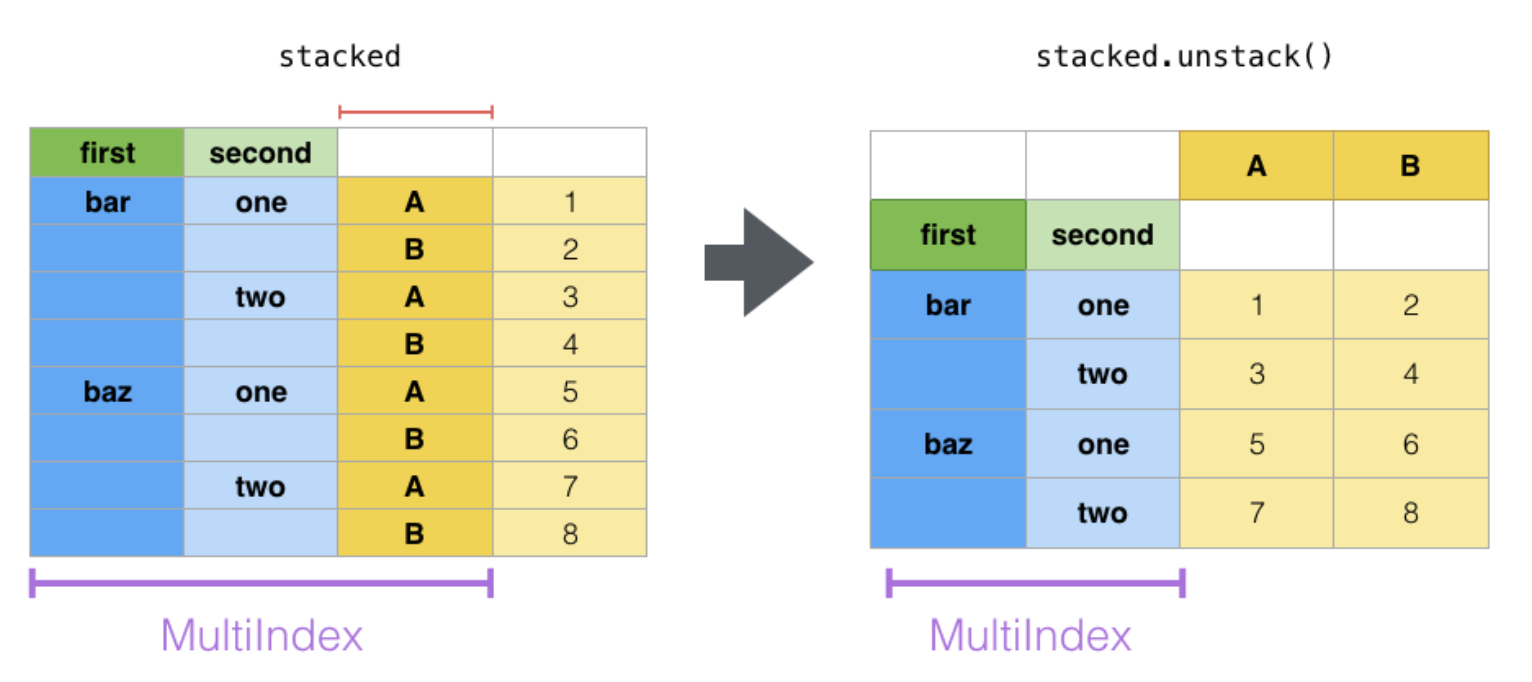

In [53]:
a.unstack(0)
a.unstack('second')

0          
                     A         B
first second                    
bar   one    -0.182731  0.231873
      two     1.741032  1.565681
baz   one     0.629483  0.086612
      two     0.283032  0.343013
foo   one     0.501256 -0.569866
      two    -0.818664  0.469587
qux   one    -1.804504 -0.632107
      two     0.506515  0.883359

## Melt

In [72]:
melted_data = pd.melt(data, id_vars='Job ID', value_vars=['Agency', 'Posting Type'])
melted_data

,Job ID,variable,value
0,424339,Agency,DEPT OF HEALTH/MENTAL HYGIENE
1,379094,Agency,NYC EMPLOYEES RETIREMENT SYS
2,520417,Agency,NYC HOUSING AUTHORITY
3,233549,Agency,NYC EMPLOYEES RETIREMENT SYS
4,510256,Agency,HUMAN RIGHTS COMMISSION
...,...,...,...
7541,457839,Posting Type,Internal
7542,527141,Posting Type,Internal
7543,509443,Posting Type,Internal
7544,352367,Posting Type,Internal


In [21]:
melted_data[melted_data['Job ID']==510670]

,Job ID,variable,value
3535,510670,Agency,OFF OF PAYROLL ADMINISTRATION
7308,510670,Posting Type,Internal


## Groupby

In [61]:
# I will make a separate video going into the details of groupby
data[['Agency', 'Salary Range From']].groupby('Agency').mean()

,Salary Range From
Agency,
ADMIN FOR CHILDREN'S SVCS,59864.200000
ADMIN TRIALS AND HEARINGS,63196.562500
BOARD OF CORRECTION,108033.333333
BOROUGH PRESIDENT-QUEENS,51860.500000
BUSINESS INTEGRITY COMMISSION,67923.222222
CAMPAIGN FINANCE BOARD,65000.000000
CIVIL SERVICE COMMISSION,62397.000000
CIVILIAN COMPLAINT REVIEW BD,54816.307692
CONFLICTS OF INTEREST BOARD,67443.500000


## Crosstab

In [62]:
pd.crosstab(data["Agency"], data["Civil Service Title"])

Civil Service Title,*SENIOR ESTIMATOR (GENERAL CON,ACCOUNTANT,ACTUARIAL SPECIALIST LEVEL I,ADM CITY PLANNER (NON MGRL),ADM CONSTRUCTION PRJ MGR-NM,ADM ENGINEER (NON MGRL),ADM MANAGER-NON-MGRL FRM M1/M2,ADM PROC ANAL-NM FRM M1-3,ADMIN ARCHITECT (NON MGRL) M-1,ADMIN COMMUNITY RELATIONS SPEC,...,TELECOMMUNICATIONS ASSOCIATE (,TELECOMMUNICATIONS MANAGER (NO,TRAFFIC CONTROL INSPECTOR,TRANSPORTATION SPECIALIST,URBAN PARK RANGER,WATER USE INSPECTOR,WATERSHED MAINTAINER,WORKER'S COMPENSATION BENEFITS,X-RAY TECHNICIAN,YOUTH DEVELOPMENT SPECIALIST
Agency,,,,,,,,,,,,,,,,,,,,,
ADMIN FOR CHILDREN'S SVCS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
ADMIN TRIALS AND HEARINGS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOARD OF CORRECTION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOROUGH PRESIDENT-QUEENS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSINESS INTEGRITY COMMISSION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAMPAIGN FINANCE BOARD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CIVIL SERVICE COMMISSION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CIVILIAN COMPLAINT REVIEW BD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CONFLICTS OF INTEREST BOARD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
keys = ["panda1", "panda2", "panda3"]

values = [["eats", "shoots"], ["shoots", "leaves"], ["eats", "leaves"]]

df = pd.DataFrame({"keys": keys, "values": values})


In [64]:
df

,keys,values
0,panda1,"[eats, shoots]"
1,panda2,"[shoots, leaves]"
2,panda3,"[eats, leaves]"


## Explode

In [71]:
# two different ways of using it
# one just gives you a series object of all the values
# another returns a new dataframe that has each list element on their own row

df["values"].explode()
df.explode('values')

,keys,values
0,panda1,eats
0,panda1,shoots
1,panda2,shoots
1,panda2,leaves
2,panda3,eats
2,panda3,leaves
